In [2]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(555)
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (15, 7)
mpl.rcParams['axes.grid'] = True
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

def read_data(timeframe):
    train = pd.read_csv("data/"+timeframe+"_train.csv")
    valid = pd.read_csv("data/"+timeframe+"_valid.csv")
    test = pd.read_csv("data/"+timeframe+"_test.csv")
    
    return train, valid, test

def get_windowed_data(tempdf, wsize):
    f = []
    l = []
    for i in range(wsize, tempdf.shape[0]):
        window = tempdf.iloc[i-wsize:i, :]
        features = window.iloc[:, :-1].values
        labels = window.iloc[-1, -1]
        f.append(features)
        l.append(labels)

    f = np.array(f)
    l = np.array(l).reshape(len(l), 1)
    return f, l

def get_train_valid_test_x_y_data(train, valid, test, timeframe):
    if timeframe == "day":
        wsize = 2
    if timeframe == "hour":
        wsize = 12
    if timeframe == "minute":
        wsize = 30
    trainx, trainy = get_windowed_data(train, wsize)
    print("TRAIN: ", "x: ", trainx.shape, " y: ", trainy.shape)
    validx, validy = get_windowed_data(valid, wsize)
    print("VALID: ", "x: ", validx.shape, " y: ", validy.shape)
    testx, testy = get_windowed_data(test, wsize)
    print("TEST: ", "x: ", testx.shape, " y: ", testy.shape)
    
    return trainx, trainy, validx, validy, testx, testy

def build_lstm_model(input_data, output_size, neurons, activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=1))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

def analyze_predictions(model, testx, testy):
    preds = pd.DataFrame({"Prediction":model.predict(testx).squeeze(), "True": testy.squeeze()})
    print("MAE: ", mae(preds["True"], preds.Prediction))
    print("RMSE: ", mse(preds["True"], preds.Prediction, squared = False))
    preds.plot(figsize = (15, 7))

def xy(df):
    return df.iloc[:, :-1], df.iloc[:, -1]

def plot_errors(modelfit):
    plt.plot(modelfit.history['loss'],'r',linewidth=2, label='Training loss')
    plt.plot(modelfit.history['val_loss'], 'g',linewidth=2, label='Validation loss')
    plt.title('LSTM')
    plt.xlabel('Epochs numbers')
    plt.ylabel('MSE numbers')
    plt.legend()
    plt.show()
    
zero_base = True
lstm_neurons = 50
epochs = 200
batch_size = 64
loss = 'mse'
dropout = 0.24
optimizer = 'adam'

# Day

In [3]:
daytrain, dayvalid, daytest = read_data("day")
daytrainx, daytrainy,dayvalidx, dayvalidy,daytestx, daytesty = get_train_valid_test_x_y_data(daytrain, dayvalid, daytest, "day")

TRAIN:  x:  (25, 2, 25)  y:  (25, 1)
VALID:  x:  (5, 2, 25)  y:  (5, 1)
TEST:  x:  (13, 2, 25)  y:  (13, 1)


In [5]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model = build_lstm_model(
    daytrainx, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)

modelfit = model.fit(
    daytrainx, daytrainy, validation_data=(dayvalidx, dayvalidy), epochs=epochs, batch_size=batch_size, verbose=2, shuffle=True, callbacks = [es])

Epoch 1/200


2022-05-23 00:44:35.527883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-23 00:44:35.644672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-23 00:44:35.686390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/1 - 1s - loss: 1.8325 - val_loss: 1.7305 - 691ms/epoch - 691ms/step
Epoch 2/200
1/1 - 0s - loss: 1.7450 - val_loss: 1.6222 - 22ms/epoch - 22ms/step
Epoch 3/200
1/1 - 0s - loss: 1.6674 - val_loss: 1.5491 - 20ms/epoch - 20ms/step
Epoch 4/200
1/1 - 0s - loss: 1.6017 - val_loss: 1.4963 - 19ms/epoch - 19ms/step
Epoch 5/200
1/1 - 0s - loss: 1.5275 - val_loss: 1.4542 - 22ms/epoch - 22ms/step
Epoch 6/200
1/1 - 0s - loss: 1.4686 - val_loss: 1.4177 - 23ms/epoch - 23ms/step


2022-05-23 00:44:35.837432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-23 00:44:35.878712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 7/200
1/1 - 0s - loss: 1.4152 - val_loss: 1.3832 - 20ms/epoch - 20ms/step
Epoch 8/200
1/1 - 0s - loss: 1.3661 - val_loss: 1.3505 - 20ms/epoch - 20ms/step
Epoch 9/200
1/1 - 0s - loss: 1.3140 - val_loss: 1.3195 - 17ms/epoch - 17ms/step
Epoch 10/200
1/1 - 0s - loss: 1.2632 - val_loss: 1.2879 - 20ms/epoch - 20ms/step
Epoch 11/200
1/1 - 0s - loss: 1.2131 - val_loss: 1.2521 - 21ms/epoch - 21ms/step
Epoch 12/200
1/1 - 0s - loss: 1.1671 - val_loss: 1.2081 - 19ms/epoch - 19ms/step
Epoch 13/200
1/1 - 0s - loss: 1.1226 - val_loss: 1.1611 - 20ms/epoch - 20ms/step
Epoch 14/200
1/1 - 0s - loss: 1.0692 - val_loss: 1.1202 - 20ms/epoch - 20ms/step
Epoch 15/200
1/1 - 0s - loss: 1.0281 - val_loss: 1.0801 - 22ms/epoch - 22ms/step
Epoch 16/200
1/1 - 0s - loss: 0.9810 - val_loss: 1.0305 - 18ms/epoch - 18ms/step
Epoch 17/200
1/1 - 0s - loss: 0.9303 - val_loss: 0.9553 - 21ms/epoch - 21ms/step
Epoch 18/200
1/1 - 0s - loss: 0.8722 - val_loss: 0.8772 - 19ms/epoch - 19ms/step
Epoch 19/200
1/1 - 0s - loss: 0

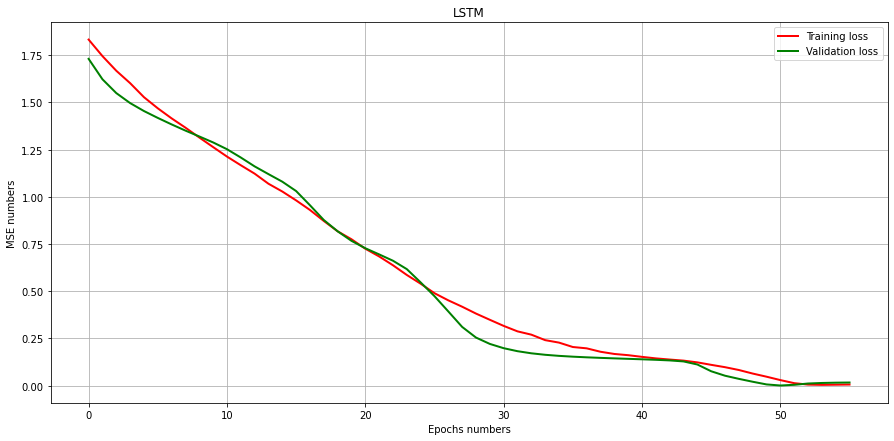

In [6]:
plot_errors(modelfit)

MAE:  0.0649659560312011
RMSE:  0.07612932843688676


2022-05-23 00:44:53.615529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-23 00:44:53.649957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


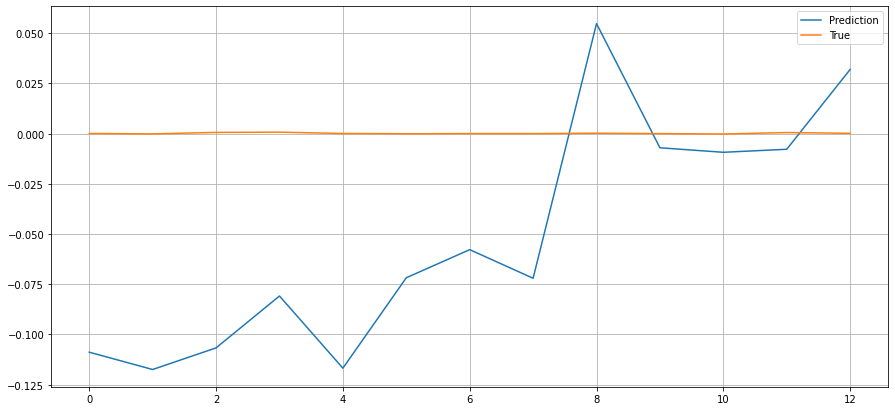

In [7]:
analyze_predictions(model, daytestx, daytesty)

# Hour

In [28]:
hourtrain, hourvalid, hourtest = read_data("hour")
hourtrainx, hourtrainy,hourvalidx, hourvalidy,hourtestx, hourtesty = get_train_valid_test_x_y_data(hourtrain, hourvalid, hourtest, "hour")

TRAIN:  x:  (676, 12, 25)  y:  (676, 1)
VALID:  x:  (161, 12, 25)  y:  (161, 1)
TEST:  x:  (358, 12, 25)  y:  (358, 1)


In [29]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model = build_lstm_model(
    hourtrainx, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)

modelfit = model.fit(
    hourtrainx, hourtrainy, validation_data=(hourvalidx, hourvalidy), epochs=epochs, batch_size=batch_size, verbose=2, shuffle=True, callbacks = [es])

Epoch 1/200


2022-05-23 00:41:03.943326: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-23 00:41:04.052164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-23 00:41:04.102143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


11/11 - 1s - loss: 5.1096 - val_loss: 4.1379 - 939ms/epoch - 85ms/step


2022-05-23 00:41:04.394310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-23 00:41:04.434285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/200
11/11 - 0s - loss: 2.5905 - val_loss: 2.3781 - 132ms/epoch - 12ms/step
Epoch 3/200
11/11 - 0s - loss: 1.3773 - val_loss: 1.3857 - 148ms/epoch - 13ms/step
Epoch 4/200
11/11 - 0s - loss: 0.6962 - val_loss: 0.7403 - 142ms/epoch - 13ms/step
Epoch 5/200
11/11 - 0s - loss: 0.3255 - val_loss: 0.3410 - 142ms/epoch - 13ms/step
Epoch 6/200
11/11 - 0s - loss: 0.1372 - val_loss: 0.1480 - 133ms/epoch - 12ms/step
Epoch 7/200
11/11 - 0s - loss: 0.0832 - val_loss: 0.0827 - 141ms/epoch - 13ms/step
Epoch 8/200
11/11 - 0s - loss: 0.0698 - val_loss: 0.0603 - 137ms/epoch - 12ms/step
Epoch 9/200
11/11 - 0s - loss: 0.0569 - val_loss: 0.0496 - 138ms/epoch - 13ms/step
Epoch 10/200
11/11 - 0s - loss: 0.0481 - val_loss: 0.0424 - 141ms/epoch - 13ms/step
Epoch 11/200
11/11 - 0s - loss: 0.0397 - val_loss: 0.0351 - 141ms/epoch - 13ms/step
Epoch 12/200
11/11 - 0s - loss: 0.0344 - val_loss: 0.0278 - 135ms/epoch - 12ms/step
Epoch 13/200
11/11 - 0s - loss: 0.0300 - val_loss: 0.0213 - 139ms/epoch - 13ms/step


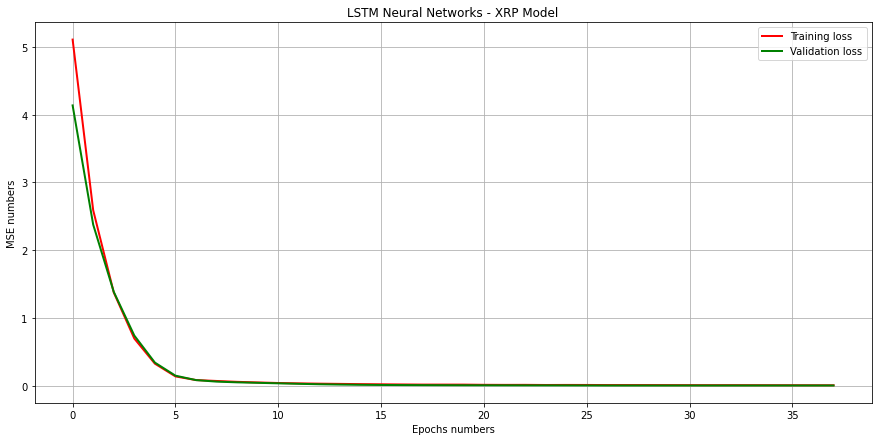

In [30]:
plot_errors(modelfit)

MAE:  0.040201814604689606
RMSE:  0.05328610825480385


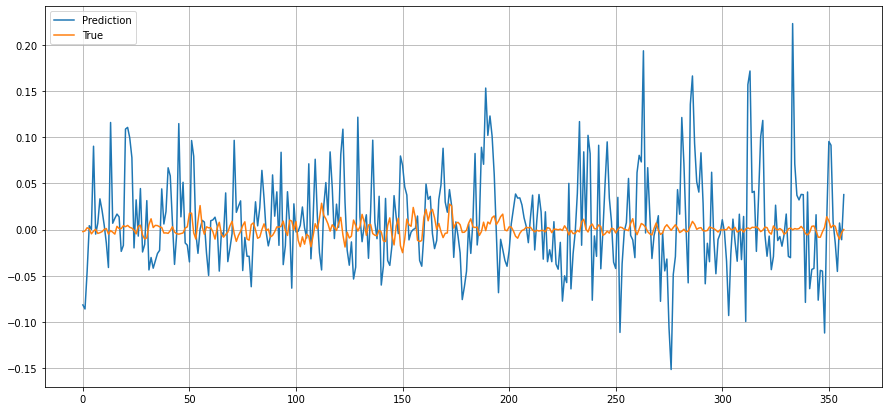

In [33]:
analyze_predictions(model, hourtestx, hourtesty)

# Minute

In [11]:
mtrain, mvalid, mtest = read_data("minute")
mtrainx, mtrainy,mvalidx, mvalidy,mtestx, mtesty = get_train_valid_test_x_y_data(mtrain, mvalid, mtest, "minute")

TRAIN:  x:  (5107, 30, 25)  y:  (5107, 1)
VALID:  x:  (1255, 30, 25)  y:  (1255, 1)
TEST:  x:  (2723, 30, 25)  y:  (2723, 1)


In [12]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model = build_lstm_model(
    mtrainx, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)

modelfit = model.fit(
    mtrainx, mtrainy, validation_data=(mvalidx, mvalidy), epochs=epochs, batch_size=batch_size, verbose=2, shuffle=True, callbacks = [es])

Epoch 1/200


2022-05-23 00:46:23.681511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-23 00:46:23.791409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-23 00:46:23.856172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-23 00:46:25.136107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-23 00:46:25.175559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


80/80 - 2s - loss: 0.4082 - val_loss: 0.0438 - 2s/epoch - 26ms/step
Epoch 2/200
80/80 - 1s - loss: 0.0314 - val_loss: 0.0276 - 1s/epoch - 16ms/step
Epoch 3/200
80/80 - 1s - loss: 0.0210 - val_loss: 0.0178 - 1s/epoch - 16ms/step
Epoch 4/200
80/80 - 1s - loss: 0.0141 - val_loss: 0.0119 - 1s/epoch - 16ms/step
Epoch 5/200
80/80 - 1s - loss: 0.0096 - val_loss: 0.0078 - 1s/epoch - 15ms/step
Epoch 6/200
80/80 - 1s - loss: 0.0064 - val_loss: 0.0049 - 1s/epoch - 15ms/step
Epoch 7/200
80/80 - 1s - loss: 0.0045 - val_loss: 0.0030 - 1s/epoch - 16ms/step
Epoch 8/200
80/80 - 1s - loss: 0.0030 - val_loss: 0.0018 - 1s/epoch - 16ms/step
Epoch 9/200
80/80 - 1s - loss: 0.0019 - val_loss: 0.0011 - 1s/epoch - 15ms/step
Epoch 10/200
80/80 - 1s - loss: 0.0012 - val_loss: 7.2269e-04 - 1s/epoch - 16ms/step
Epoch 11/200
80/80 - 1s - loss: 7.6057e-04 - val_loss: 4.4736e-04 - 1s/epoch - 16ms/step
Epoch 12/200
80/80 - 1s - loss: 4.6988e-04 - val_loss: 2.9325e-04 - 1s/epoch - 16ms/step
Epoch 13/200
80/80 - 1s - los

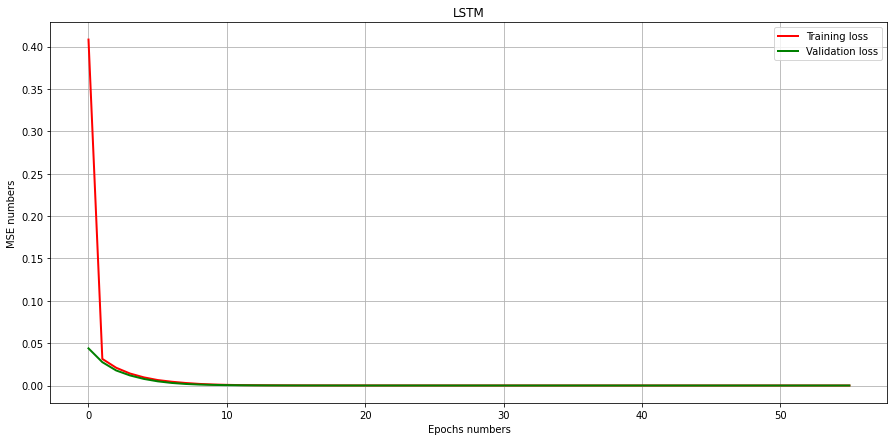

In [13]:
plot_errors(modelfit)

2022-05-23 00:47:52.072233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-23 00:47:52.107653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


MAE:  0.004786188595396605
RMSE:  0.005389864970981548


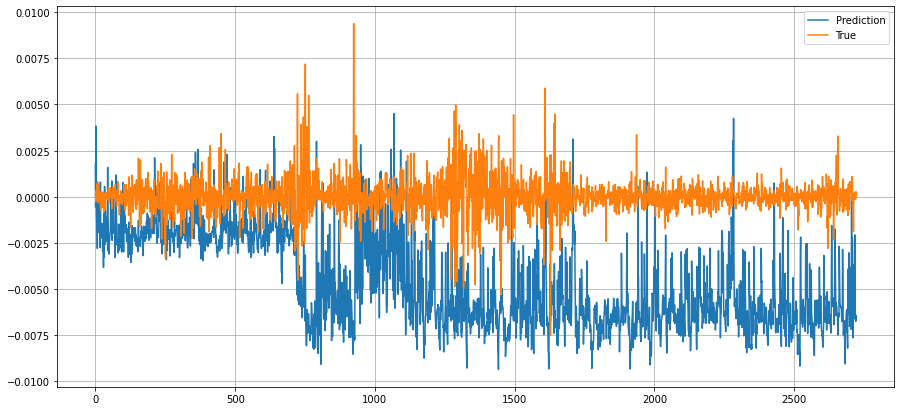

In [14]:
analyze_predictions(model, mtestx, mtesty)